In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#CNN Model
class SignLanguageCNN(nn.Module):
    def __init__(self):
        super(SignLanguageCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 3 * 3, 25)
        )

    def forward(self, x, epoch=None):
        x = self.cnn(x)
        x = self.fc(x)
        return x

In [ ]:
model = SignLanguageCNN()

In [ ]:
# Laden des Modells
model.load_state_dict(torch.load("sign_language_cnn.pth"))
model.eval()  # Setzt das Modell in den Evaluierungsmodus

<ipython-input-4-6586a5f1a910>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("sign_language_cnn.pth"))


SignLanguageCNN(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.6, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Dropout(p=0.6, inplace=False)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=25, bias=True)
  )
)

<class 'numpy.ndarray'>
[[252 248 243 ... 195 198 203]
 [252 248 243 ... 195 197 200]
 [252 248 243 ... 195 195 196]
 ...
 [255 251 244 ... 131 152 187]
 [250 244 244 ... 178 187 203]
 [255 250 251 ... 203 207 215]]
<class 'tuple'>


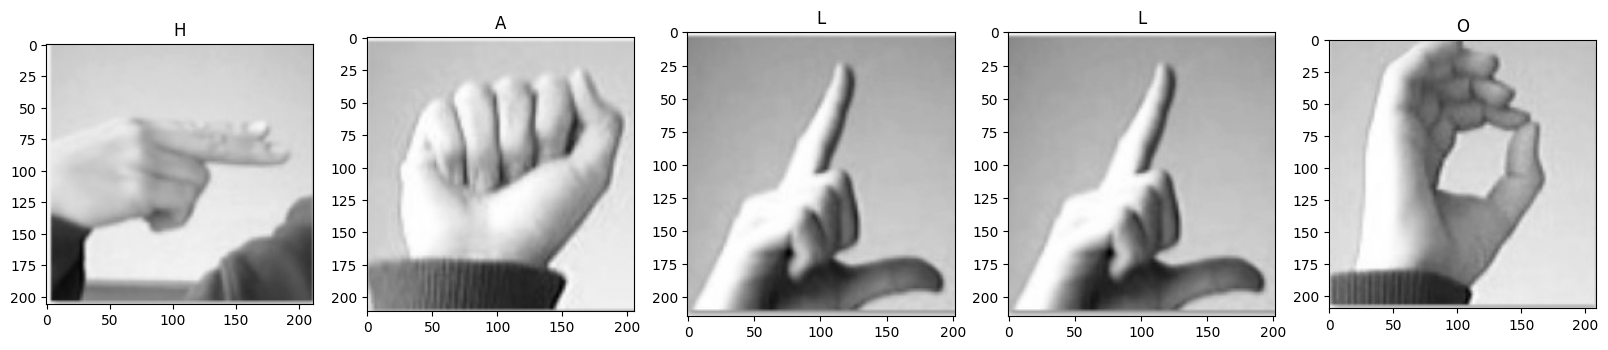

In [ ]:
import cv2 as cv

# Bilder einlesen (screenshots von amer_sign2.png)
img1 = cv.imread("/screenshotHsignpng2.jpg")
img2 = cv.imread("/screenshotAsignpng2.jpg")
img3 = cv.imread("/screenshotLsignpng2.jpg")
img4 = cv.imread("/screenshotLsignpng2.jpg")
img5 = cv.imread("/screenshotOsignpng2.jpg")

# Konvertiere Bilder in Graustufen
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

#Bilder und Labels ausgeben
figure, location = plt.subplots(1,5, figsize= (20,5))
location[0].imshow(img1,cmap="grey", interpolation = "antialiased")
location[1].imshow(img2,cmap="grey", interpolation = "antialiased")
location[2].imshow(img3,cmap="grey", interpolation = "antialiased")
location[3].imshow(img4,cmap="grey", interpolation = "antialiased")
location[4].imshow(img5,cmap="grey", interpolation = "antialiased")

location[0].set_title("H")
location[1].set_title("A")
location[2].set_title("L")
location[3].set_title("L")
location[4].set_title("O")

# Datentyp prüfen
print(type(img1))
print(img1)

# Bilder in einem Tuple speichern
imgList = (img1, img2, img3, img4, img5)
print(type(imgList))


In [ ]:
#Liste für die Umsetzung von Labels zu Buchstaben
#j als Platzhalter könnte auch leerer string sein
translation_list = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y"]

In [ ]:
# Variable für die Übersetzung
word = ""

# Schleife in der das Bild vorhergesagt wird und wert an der die Variable angehängt wird
model.eval()
for img in imgList:
    img_tensor = torch.from_numpy(cv.resize(img, (28, 28))).float().unsqueeze(0).unsqueeze(0)

    # Tensor für die Vorhersage an das Model übergeben
    result = model(img_tensor)

    # Ergebnis erhalten
    _, predicted_label = torch.max(result, 1)
    char = translation_list[predicted_label.item()]

    # Buchstaben an das Wort anhängen
    word += char

# Ausgabe des Wortes
print("Predicted word:", word)

Predicted word: hallo
